In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
thickness_axes = 1.4
mpl.rcParams['axes.linewidth'] = thickness_axes #set the value globally

## DISTRIBUTIONS FOR ONE SAMPLE

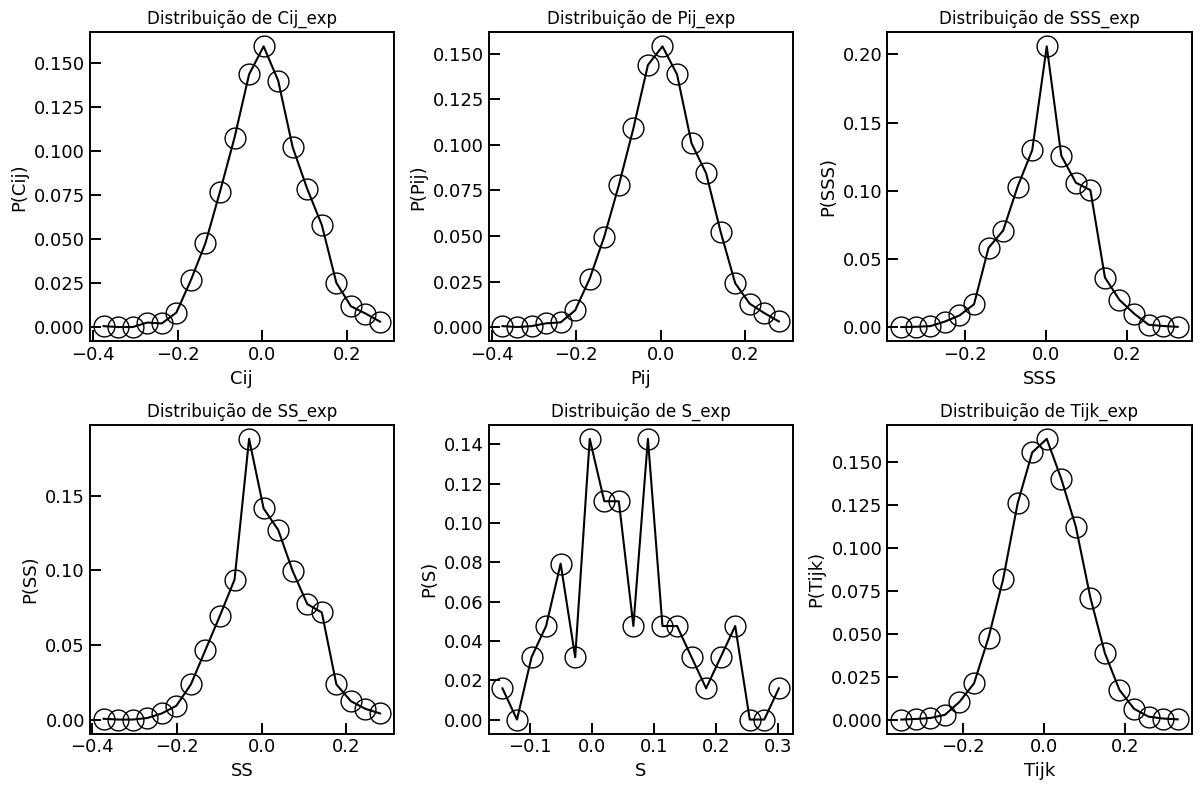

In [ ]:
# Cij_exp, Pij_exp, Tijk_exp, S_exp, SS_exp, SSS_exp -> keys of data
with open("../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4749/Configs/c015_Satu.json", 'r') as file:
    data = json.load(file)

# Assumindo que `data` é um dicionário com as chaves que queremos plotar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Iterar pelas chaves e subplots
for i, key in enumerate(data.keys()):
    hist, bin_edges = np.histogram(data[key], bins=20)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist / np.sum(hist)

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Determinar a posição no subplot (linha e coluna)
    ax = axs[i // 3, i % 3]
    ax.plot(k, P_k, marker='o', linestyle='-', markersize=15, mec='k', mfc='none', color='k')
    ax.set_xlabel(f'{key[:-4]}', fontsize=13)
    ax.set_ylabel(f"P({key[:-4]})", fontsize=13)
    ax.set_title(f'Distribuição de {key}')

    ax.tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)
    # Set thickness for spines
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
#plt.savefig("../presentation/exp_means_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4749_c005_Satu.pdf", dpi=300)
plt.show()

## DISTRIBUTIONS FOR ONE SAMPLE WITHOUT NORMALIZED

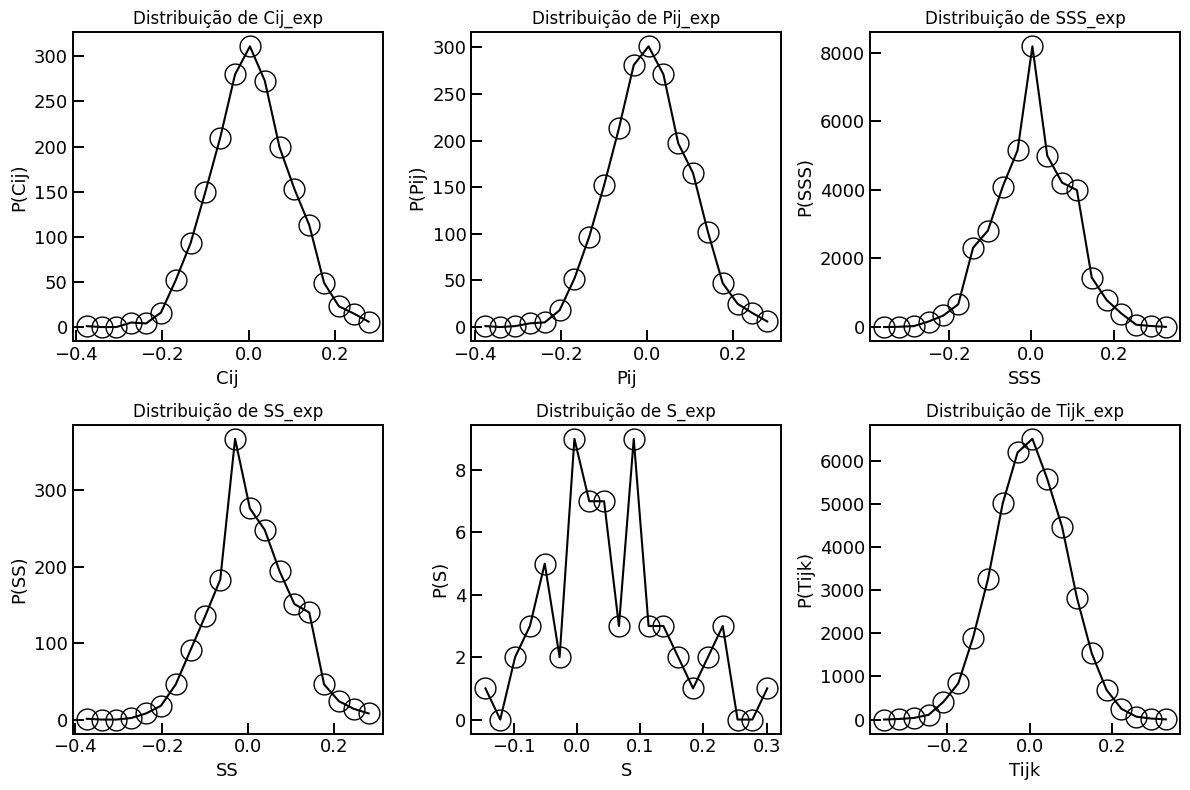

In [ ]:
# Cij_exp, Pij_exp, Tijk_exp, S_exp, SS_exp, SSS_exp -> keys of data
with open("../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4749/Configs/c015_Satu.json", 'r') as file:
    data = json.load(file)

# Assumindo que `data` é um dicionário com as chaves que queremos plotar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Iterar pelas chaves e subplots
for i, key in enumerate(data.keys()):
    hist, bin_edges = np.histogram(data[key], bins=20)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Determinar a posição no subplot (linha e coluna)
    ax = axs[i // 3, i % 3]
    ax.plot(k, P_k, marker='o', linestyle='-', markersize=15, mec='k', mfc='none', color='k')
    ax.set_xlabel(f'{key[:-4]}', fontsize=13)
    ax.set_ylabel(f"P({key[:-4]})", fontsize=13)
    ax.set_title(f'Distribuição de {key}')

    ax.tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)


# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
#plt.savefig("../presentation/exp_means_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4749_c005_Satu.pdf", dpi=300)
plt.show()

## DISTRIBUTIONS FOR ALL SAMPLES

In [ ]:
# set all json files
json_files = glob.glob("../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4749/Configs/*.json")

# start with empty dictionary
concatenated_data = {}

# Iterar sobre os arquivos e concatenar dados
for file_path in json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
        for key, values in data.items():
            if key not in concatenated_data:
                concatenated_data[key] = []
            concatenated_data[key].extend(values)

# Salvar o dicionário concatenado em um novo arquivo JSON
with open("concatenated_data.json", 'w') as output_file:
    json.dump(concatenated_data, output_file, indent=4)

In [9]:
filtered_data = {}
for key, values in concatenated_data.items():
    values = np.array(values)
    q1, q3 = np.percentile(values, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_data[key] = values[(values >= lower_bound) & (values <= upper_bound)]

In [ ]:
# Cij_exp, Pij_exp, Tijk_exp, S_exp, SS_exp, SSS_exp -> keys of data
with open("concatenated_data.json", 'r') as file:
    data = json.load(file)

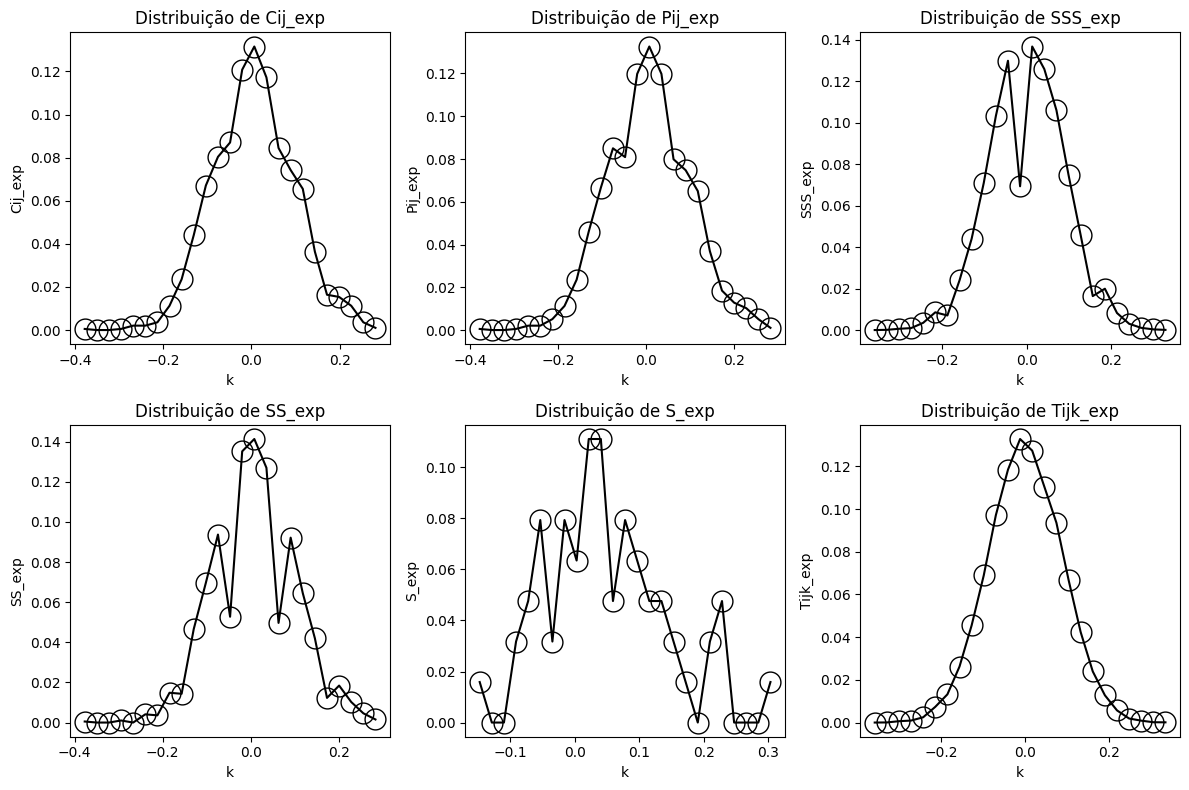

In [ ]:
# Assumindo que `data` é um dicionário com as chaves que queremos plotar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Iterar pelas chaves e subplots
for i, key in enumerate(data.keys()):
    hist, bin_edges = np.histogram(data[key], bins=25)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist / np.sum(hist)

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Determinar a posição no subplot (linha e coluna)
    ax = axs[i // 3, i % 3]
    ax.plot(k, P_k, marker='o', linestyle='-', markersize=15, mec='k', mfc='none', color='k')
    ax.set_xlabel(f'{key[:-4]}', fontsize=13)
    ax.set_ylabel(f"P({key[:-4]})", fontsize=13)
    ax.set_title(f'Distribuição de {key}')

    ax.tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)
    # Set thickness for spines
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)


# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
#plt.savefig("../presentation/exp_means_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4749_c005_Satu.pdf", dpi=300)
plt.show()

## DISTRIBUTIONS FOR ALL SAMPLES WITHOUT NORMALIZED

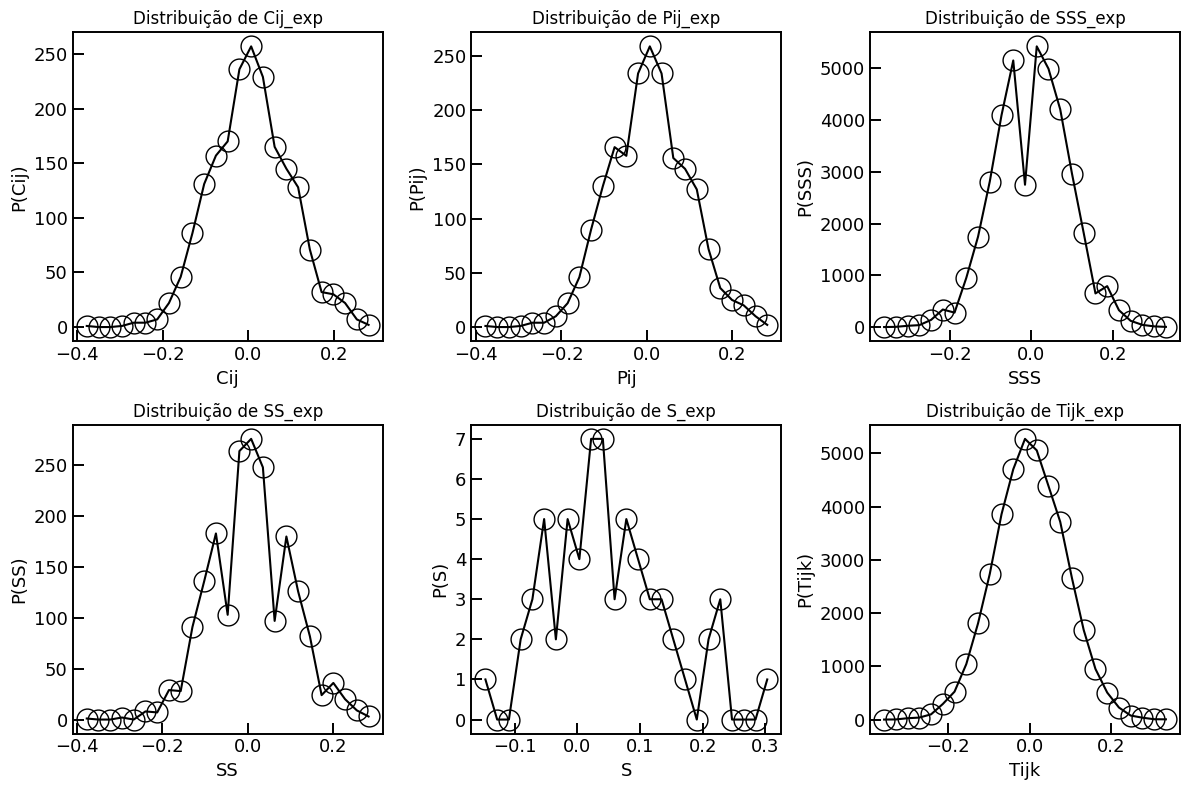

In [ ]:
# Assumindo que `data` é um dicionário com as chaves que queremos plotar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Iterar pelas chaves e subplots
for i, key in enumerate(data.keys()):
    hist, bin_edges = np.histogram(data[key], bins=25)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Determinar a posição no subplot (linha e coluna)
    ax = axs[i // 3, i % 3]
    ax.plot(k, P_k, marker='o', linestyle='-', markersize=15, mec='k', mfc='none', color='k')
    ax.set_xlabel(f'{key[:-4]}', fontsize=13)
    ax.set_ylabel(f"P({key[:-4]})", fontsize=13)
    ax.set_title(f'Distribuição de {key}')

    ax.tick_params(which='major', width=thickness_axes, length=8, direction="in", labelsize=13)
    # Set thickness for spines
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)


# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
#plt.savefig("../presentation/exp_means_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4749_c005_Satu.pdf", dpi=300)
plt.show()